# Classic MCMC

# Problem
- Distributions encountered in real-life are often too complex to directly perform Monte Carlo-based estimations
- Consider random variable $X$ with PDF $f_X$
- The expectation of a function $\phi$ under the law of $X$ is given by
$$ \mathbb{E}_X[\phi] =\int \phi(\xi)f_X(\xi) \, \mathrm{d} \xi$$
- However, the estimator $$\mathbb{E}_X[f] \simeq \frac{1}{N} \sum_{n=1}^{N} \phi(x_n)$$
cannot be easily used anymore, when $f_X$ is too complicated, i.e. .
- Curse of dimensionality:
    - Traditional MC not scaling to high-dimensional problem settings
    - Amount of necessary samples for proper approximations explodes

# Goal
- Nevertheless, draw samples that adhere to $X$
- Assumption:
    - We know $f_X$ up to a multiplicative constant $c\neq 0$: $$f_X = \frac{1}{c} \tilde{f}_X$$
    - We can easily evaluate the energy $\tilde{f}_X$

# Markov Chain Monte Carlo

- Idea:
    - Utilize divide-and-conquer strategy, by iteratively sampling from simpler sub-distributions and remembering the current state
    - Converge to samples that follow $f_X$

- Thus, a sampling trajectory corresponds to generating a Markov chain
- This yields so-called _Markov Chain Monte Carlo_ techniques
- MCMC algorithms rely heavily on Markov chain theory

# Markov Chains

- Markov Chains are stochastic processes: $$ (X_t)_{t \in \mathbb{T}}.$$
- All $X_t$ live on the same probability space $(\Omega, \mathcal{A}, P)$
- We consider a family of random variables indexed by a time parameter $t$
- The state space $S:= \{X_t(\omega) | \omega \in \Omega\}$ can be either continuous or discrete
- In this session, we are interested in processes with discrete, i.e. at most countable, index sets $\mathbb{T}=\{0, 1,  \dots\}$.
- We refer to discrete-time stochastic processes, which have the so-called  Markov property as _Markov chains_


# Markov Property
![test](imgs/0000-non-markov.png)
![test](imgs/0001-markov.png)

The future depends only on the current state...

# Markov Chain Monte Carlo: Idea
- Start from state given by some proposal distribution
- Traverse Markov chain, until stationary distribution $\pi$ of chain is reached
- Goal:
![test](imgs/0002-stationary.png)
- Questions:
    - How to ensure that the Markov chain converges exactly one limitting distribution $\pi$?
    - How to set this limitting distribution to the one we want to sample from?
    - $\to$ Theory gives answers

# Markov Chains: Theory

- For the next considerations, we assume a homogeneous, discrete Markov chain:
    - (Time-Homogenity): A Markov chain is homogeneous if$$P(X_{t+1} = i | X_{t} = j) = P(X_{1} = i | X_{0} = j) \quad \forall t \in \mathbb{T}, \forall i, j \in S$$
    The transition probabilities do not change over time. Makes everything much simpler...
    - Discrete:
        - Time: As already mentioned: $\mathbb{T}=\mathbb{N}$
        - State: Also, $S$ is considered countable

![0004-stationary.png](imgs/0004-graph.png)
- In the discrete homogeneous case, the transition probabilities can be summarized in a transition matrix $T$ that stays unchanged over time
- $T$ is a stochastic matrix: Each row of $T$ sums to one and every element is in $[0, 1]$
- The (left) eigenvectors of $T$ are named stationary distributions, because once reached they do not change anymore: $$w^{\top} T = w^{\top}.$$

# Markov Chains: Theory

- Now what about the long-term behavior?
- Given the start state distribution: $$w_0=\begin{pmatrix}w_1 & w_2 & \cdots & w_{|S|}\end{pmatrix}^{\top} \in \Delta_{|S|}$$
- We know that the state distribution at time $t$ is given by $$w_t^{\top} = w_0^{\top} T^t$$
- Now consider $$\pi = \lim_{t\to \infty} w_0^{\top} T^t \quad \forall w_0 \in \Delta_{|S|}$$
- Questions:
    - When does the limiting distribution $\pi$ exist?
    - When is it unique?

- Answer:
    - If the Markov chain is ergodic, a stationary distribution $\pi$ exists and is unique
    - The Markov chain will converge to $\pi$
    - In other words: The Markov chain has to be homogeneous, irreducible and aperiodic
    - More simply:
        - It should be possible to get from every state to every other state in finite time
        - The chain can not get stuck in circular structures

# Metropolis-Hastings Algorithm

* Original idea introduced by Metropolis and Ulam in 1949
* Metropolis algorithm introduced in 1953
* Metropolis-Hastings algorithm in 1970
- Luckily, the MH Algorithm produces such Markov chain.

interactive(children=(IntSlider(value=1, description='n', max=281, min=1, step=10), Output()), _dom_classes=('…

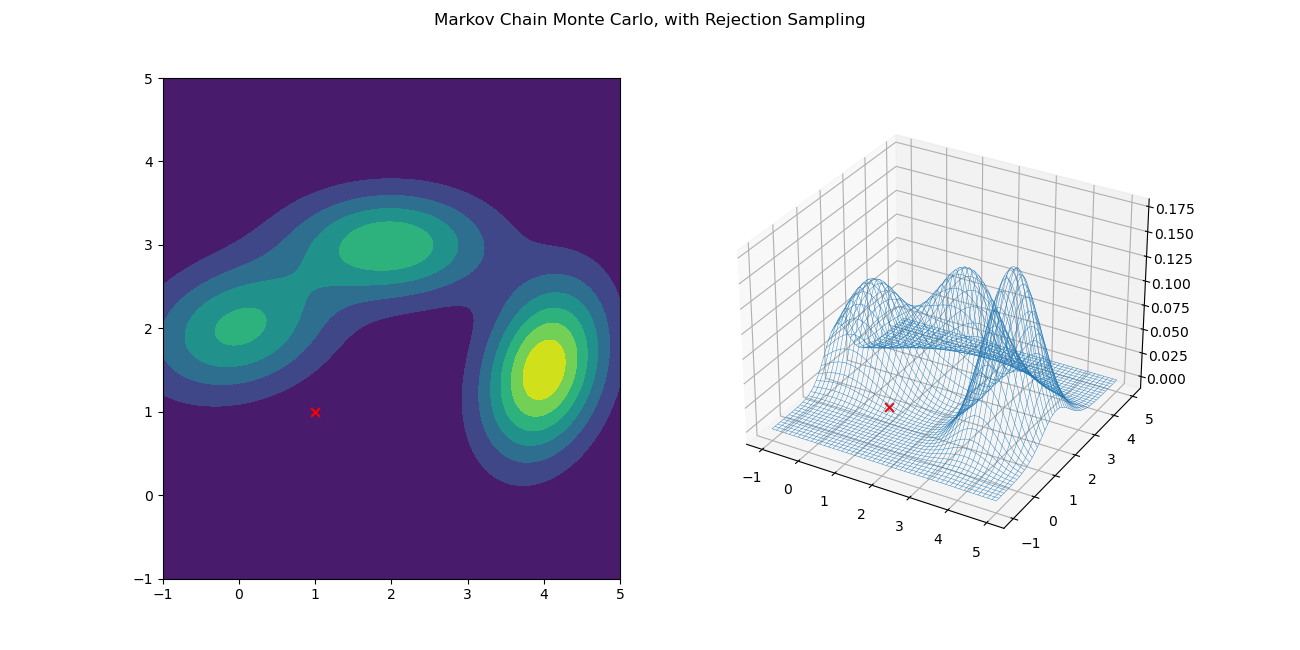

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(4)

def squared_mahalanobis_dist(d, metric):
    return np.sum(((d @ metric) * d), axis=-1)


def multivariate_normal_pdf(x, mean, cov):
    scale = 1 / np.sqrt(np.linalg.det(2 * np.pi * cov))
    d = x - np.expand_dims(mean, axis=0)
    metric = np.linalg.inv(cov)
    density = scale * np.exp(-0.5 * squared_mahalanobis_dist(d, metric))
    return density


def gmm(x, alphas, means, covs):
    nr_samples = x.shape[0]
    _, dim = means.shape

    density = np.zeros(nr_samples)

    for alpha, mean, cov in zip(alphas, means, covs):
        density += alpha * multivariate_normal_pdf(x, mean, cov)

    return density

# Make data.
n_points = 500
X1 = np.linspace(-1, 5, n_points)
X2 = np.linspace(-1, 5, n_points)
xx, yy = np.meshgrid(X1, X2)
grid = np.stack([xx.flatten(), yy.flatten()]).T

alphas = np.array([0.3, 0.4, 0.3])
means = np.array([[0, 2], [4, 1.5], [2, 3]])
covs = np.array([[[0.7, 0.1],
                  [0.1, 0.3]],
                 [[0.3, 0.1],
                  [0.1, 0.5]],
                 [[0.8, 0.0],
                  [0.0, 0.2]]])

joint = gmm(grid, alphas, means, covs).reshape(n_points, n_points)

fig = plt.figure(figsize=(13, 6.5))
fig.suptitle('Markov Chain Monte Carlo, with Rejection Sampling')
ax2d = fig.add_subplot(1, 2, 1)

ax = fig.add_subplot(1, 2, 2, projection='3d')

fig.canvas.header_visible = False
fig.canvas.footer_visible = False

# surf = ax.plot_surface(xx, yy, joint, alpha=1, cmap="viridis")
ax.set_xlabel(r"$X^{(1)}$")
ax.set_ylabel(r"$X^{(2)}$")
ax.set_zlabel(r"$f_{X^{(1)}, X^{(2)}}$")
# ax2d.contourf(xx, yy, joint, alpha=0.7, cmap="viridis")

def metropolis_hastings(density, steps, stepsize=5 * 0.01):
    rand = np.random.default_rng(1337)
    sigma = stepsize
    start = np.array([[1, 1]])
    trajectory = [start]
    densities = [density(start)]

    for i in range(steps):
        old = trajectory[-1]
        proposal = old + sigma * np.random.randn(*old.shape)

        density_proposal = density(proposal)
        density_old = density(old)
        acceptance_probability = np.minimum(1, density_proposal / density_old)
        u = np.random.rand()
        if u <= acceptance_probability:
            trajectory.append(proposal)
            densities.append(density_proposal)
        else:
            trajectory.append(old)
            densities.append(density_old)

    return np.array(trajectory), np.array(densities)


def gmm_density(x):
    return gmm(x, alphas, means, covs)

    
trajectory, densities = metropolis_hastings(gmm_density, 280)

from ipywidgets import *

@widgets.interact(n=(1, len(trajectory), 10))

def update(n=1):

    ax.clear()
    ax2d.clear()
    ax2d.contourf(xx, yy, joint, cmap="viridis")
    ax.plot_wireframe(xx, yy, joint, cmap="viridis", linewidth=0.3)
    everynth = 20
    for xs, ys, zs in zip(trajectory[0:n:everynth], trajectory[0:n:everynth], densities[0:n:everynth]):
        x = xs.ravel()[0]
        y = ys.ravel()[1]
        z = zs.ravel() + 0.0001
        ax.scatter(x, y, z, s=40, zorder=10, marker="x", color="r")

    ax2d.scatter(trajectory[n-1][0, 0], trajectory[n-1][0, 1], c="r", s=40, zorder=2, marker="x")
plt.show()